In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from indic_transliteration import sanscript
from indic_transliteration.sanscript import SchemeMap, SCHEMES, transliterate
import matplotlib.pyplot as plt
test = pd.read_csv('finaltest.csv')
dev = pd.read_csv('finaldev.csv')
train = pd.read_csv('finaltrain.csv')

In [2]:
train.head()

,Colling,Context,Components,Tag,labels
0,मन्द-स्वरेण,वृद्धम् पश्यन् मन्द-स्वरेण अयम् तादृशम् किञ्चन...,मन्द-स्वरेण,k1,Tatpurusha
1,पशु-पक्षिणः,पशु-पक्षिणः अपि आश्रम-परिसरम् त्यक्तवन्तः,पशु-पक्षिणः,Di,Dvandva
2,जल-पात्रम्,इति ब्रुवन्त्या कमलया पूरितम् जल-पात्रम् श्वसु...,जल-पात्रम्,T6,Tatpurusha
3,मृत्-सुरभिः,तृतीये सर्गे च तदा आननम् मृत्-सुरभिः क्षिति-ईश...,मृत्-सुरभिः,T6,Tatpurusha
4,न-शक्य,न-शक्य एव च परिणामः भवति उन्माद:,न-शक्य,Tn,Tatpurusha


In [3]:
dev.head()

,Colling,Context,Components,Tag,labels
0,द्रवीभूत-हृदयः,पत्रम् इदम् पठित्वा द्रवीभूत-हृदयः अश्रूपूर्णा...,द्रवीभूत-हृदयः,Bs6,Bahuvrihi
1,शैशव-अवस्थायाम्,शैशव-अवस्थायाम् श्रुताम् सिंह-सूकर-युद्ध-कथाम्...,शैशव-अवस्थायाम्,T6,Tatpurusha
2,प्रति-फलन्,नद्या नीरे प्रति-फलन् विषण्ण-वदन: कलानाथ: शनै:...,प्रति-फलन्,Tp,Tatpurusha
3,फल-हेतुकाः,प्रतिपन्न-नियोग-प्रतिषेध-अर्थः हि फल-हेतुभ्याम...,फल-हेतुभ्याम्,Di,Dvandva
4,अन्-अघ!,लोके अस्मिन् द्विविधा निष्ठा पुरा प्रोक्ता मया...,न-अघ,Bs6,Bahuvrihi


In [4]:
train.head()

,Colling,Context,Components,Tag,labels
0,मन्द-स्वरेण,वृद्धम् पश्यन् मन्द-स्वरेण अयम् तादृशम् किञ्चन...,मन्द-स्वरेण,k1,Tatpurusha
1,पशु-पक्षिणः,पशु-पक्षिणः अपि आश्रम-परिसरम् त्यक्तवन्तः,पशु-पक्षिणः,Di,Dvandva
2,जल-पात्रम्,इति ब्रुवन्त्या कमलया पूरितम् जल-पात्रम् श्वसु...,जल-पात्रम्,T6,Tatpurusha
3,मृत्-सुरभिः,तृतीये सर्गे च तदा आननम् मृत्-सुरभिः क्षिति-ईश...,मृत्-सुरभिः,T6,Tatpurusha
4,न-शक्य,न-शक्य एव च परिणामः भवति उन्माद:,न-शक्य,Tn,Tatpurusha


In [5]:
#Checking out the shape of train and test data
import pandas as pd
train.shape#,test.shape

(9356, 5)

# Data validation for compound classification for Mbert

In [39]:
def check_num_samples(train,dev,test):
    print("samples shape in train ",train.shape)
    print("samples shape in dev ",dev.shape)
    print("samples shape in test ", test.shape)
    print()
    print("total len of Colling in train data",len(train["Colling"]))
    print("unique entries in Colling train data",len(set(train["Colling"])))
    print("total len of Colling in test data",len(test["Colling"]))
    print("unique entries in Colling test data",len(set(test["Colling"])))
    print("finding intersection bw train and test set ",set(test["Colling"]).intersection(set(train["Colling"])))

    print("********************************************************************************")
    print("total len of Components in train data",len(train["Components"]))
    print("unique entries in Components train data",len(set(train["Components"])))
    print("total len of Components in test data",len(test["Components"]))
    print("unique entries in Components test data",len(set(test["Components"])))
    print("finding intersection bw train and test set ",set(test["Components"]).intersection(set(train["Components"])))
    print("**********************************************************************************")
    print("unique entries in Final_Clean_Context_d test data",len(set(test["Components"])))
    print("finding intersection bw train and test set ",len(pd.merge(train, test, how ='inner'))) #becz 

    print("***********************************************************************************")
    print("***********************************************************************************")

    print("total len of Colling in train data",len(dev["Colling"]))
    print("unique entries in Colling train data",len(set(dev["Colling"])))
    print("finding intersection bw dev and test set ",set(dev["Colling"]).intersection(set(test["Colling"])))

    print("********************************************************************************")
    print("total len of Components in dev data",len(dev["Components"]))
    print("unique entries in Components dev data",len(set(dev["Components"])))
    print("finding intersection bw dev and test set Components column",set(dev["Components"]).intersection(set(test["Components"])))
    print("finding intersection bw dev and test set ",len(pd.merge(dev, test, how ='inner'))) #becz 

check_num_samples(train,dev,test)


samples shape in train  (9356, 5)
samples shape in dev  (2339, 5)
samples shape in test  (2994, 5)

total len of Colling in train data 9356
unique entries in Colling train data 5678
total len of Colling in test data 2994
unique entries in Colling test data 1822
finding intersection bw train and test set  set()
********************************************************************************
total len of Components in train data 9356
unique entries in Components train data 5715
total len of Components in test data 2994
unique entries in Components test data 1838
finding intersection bw train and test set  set()
**********************************************************************************
unique entries in Final_Clean_Context_d test data 1838
finding intersection bw train and test set  0
***********************************************************************************
***********************************************************************************
total len of Colling in train d

In [7]:

def check_num_samples(train,dev,test):
    print("samples shape in train ",train.shape)
    print("samples shape in dev ",dev.shape)
    print("samples shape in test ", test.shape)
    print()
    
    print("********************************************************************************")
    print("total len of Components in train data",len(train["components"]))
    print("unique entries in Components train data",len(set(train["components"])))
    print("total len of Components in test data",len(test["components"]))
    print("unique entries in Components test data",len(set(test["components"])))
    print("finding intersection bw train and test set ",set(test["components"]).intersection(set(train["components"])))
    print("**********************************************************************************")
    print("unique entries in context test data",len(set(test["components"])))
    print("finding intersection bw train and test set ",len(pd.merge(train, test, how ='inner'))) #becz 

    print("***********************************************************************************")
    print("unique entries in Components dev data",len(set(dev["components"])))
    print("finding intersection bw train and dev set ",set(test["components"]).intersection(set(dev["components"])))

train_cooling,dev_cooling,test_cooling = pd.read_csv('cooling/train_cooling.csv'),pd.read_csv('cooling/dev_cooling.csv'),pd.read_csv('cooling/test_cooling.csv')
check_num_samples(train_cooling,dev_cooling,test_cooling)


samples shape in train  (6354, 2)
samples shape in dev  (1591, 2)
samples shape in test  (1994, 2)

********************************************************************************
total len of Components in train data 6354
unique entries in Components train data 6354
total len of Components in test data 1994
unique entries in Components test data 1994
finding intersection bw train and test set  set()
**********************************************************************************
unique entries in context test data 1994
finding intersection bw train and test set  0
***********************************************************************************
unique entries in Components dev data 1591
finding intersection bw train and dev set  set()


In [4]:
#2.check ratio bw all 4 classes
# def check_ratios(train,test):
l1 = train["Tag"].value_counts()
l2 = test['Tag'].value_counts()
l1,l2 = dict(l1),dict(l2)
print(l1,l2) 
vals1 = list(l1.values())
vals2 = list(l2.values())
rat1 = vals2/vals2[-1]
rat2 = vals1/vals1[-1]

ratios = [i/j for i,j in zip(rat1,rat2)]
print()
print()
print("    ",l1.keys())
print("ratios classes ",ratios)

#For cooling Data
# check_ratios(train,test)
#Please calculate accordingly as per ratios needed


{'T6': 1516, 'Bs6': 1426, 'K1': 1331, 'Tn': 904, 'Di': 670, 'Tp': 477, 'BvS': 466, 'A1': 419, 'T3': 317, 'T7': 182, 'Bvp': 178, 'Bsmn': 144, 'U': 130, 'Ds': 117, 'Bs3': 116, 'K7': 96, 'Bs5': 81, 'Km': 67, 'T5': 62, 'Bv': 60, 'T4': 57, 'K6': 56, 'Bs7': 54, 'K2': 54, 'Bvs': 32, 'Tg': 32, 'T1': 31, 'T2': 31, 'k1': 26, 'Bss': 23, 'Tm': 19, 'Bsp': 17, 'Tds': 16, 'BvU': 12, 'K3': 11, 'Bsu': 11, 'K4': 10, 'BvP': 10, 'd': 9, 'A7': 9, 'Tdt': 7, 'Tk': 7, 'K5': 7, 'BS6': 5, 'Bs': 5, 'ds': 5, 'D': 4, 'A2': 4, 'k7': 4, 'T': 3, 'E': 2, 'Bs4': 2, 'BS3': 2, 'BsU': 1, 'Tm7': 1, 'Bvtu': 1, 'Bs2': 1, 'Bv3': 1, 'u': 1, 't6': 1, 'BV': 1, 'Bb': 1, 'B': 1, 'A': 1, 'BS7': 1, 'Bsn': 1, 'BVS': 1, 'k2': 1, 'TM': 1, 'K': 1, 'Tdu': 1, 'BS5': 1, 'D1': 1} {'Bs6': 470, 'T6': 405, 'Tn': 348, 'K1': 280, 'Di': 263, 'BvS': 172, 'Tp': 164, 'A1': 139, 'T3': 91, 'Bsmn': 59, 'Bs3': 58, 'T7': 53, 'Ds': 50, 'Bvp': 49, 'U': 47, 'K7': 39, 'Km': 26, 'T4': 22, 'Bs7': 21, 'Bv': 20, 'Bvs': 20, 'K2': 16, 'Tds': 16, 'Tm': 14, 'Tdt': 1

In [12]:
pk = [i<100 for i in vals1]

In [15]:
vals1

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [16]:
len(vals1)

73

In [19]:
vals1.sort()

In [35]:
ash

8393

In [37]:
ash

963

In [36]:
ash = 0
cp=0
for key,values in l1.items():
    cp+=1
    if cp<=15:
        continue
    ash+=values


In [28]:
alala = []
for i in vals1:
    if i>100:
        alala.append(i)
len(alala)

15

In [ ]:
#2.check ratio bw all 4 classes
def check_ratios(train,test):
    l1 = train["label"].value_counts()
    l2 = test['label'].value_counts()
    l1,l2 = dict(l1),dict(l2)
    print(l1,l2) 
    vals1 = list(l1.values())
    vals2 = list(l2.values())
    rat1 = vals2/vals2[-1]
    rat2 = vals1/vals1[-1]

    ratios = [i/j for i,j in zip(rat1,rat2)]
    print()
    print()
    print("    ",l1.keys())
    print("ratios classes ",ratios)

#For cooling Data
check_ratios(train_cooling,test_cooling)
#Please calculate accordingly as per ratios needed


## This cell below will check if a ratio is maintned properly bw train and test classes, otherwise training can affect

In [9]:
#2.check ratio bw all 4 classes
"""
For main test
"""
def check_ratios(train,test):
    l1 = train["labels"].value_counts()
    l2 = test['labels'].value_counts()
    l1,l2 = dict(l1),dict(l2)
    print(l1,l2) 
    vals1 = list(l1.values())
    vals2 = list(l2.values())
    rat1 = vals2/vals2[-1]
    rat2 = vals1/vals1[-1]

    ratios = [i/j for i,j in zip(rat1,rat2)]
    print()
    print()
    print("    ",l1.keys())
    print("ratios classes ",ratios)

check_ratios(train,test)
#Please calculate accordingly as per ratios needed


{'Tatpurusha': 5460, 'Bahuvrihi': 2655, 'Dvandva': 808, 'Avyayibhava': 433} {'Tatpurusha': 1613, 'Bahuvrihi': 923, 'Dvandva': 316, 'Avyayibhava': 142}


     dict_keys(['Tatpurusha', 'Bahuvrihi', 'Dvandva', 'Avyayibhava'])
ratios classes  [0.9008267554042202, 1.060075329566855, 1.1925463673127878, 1.0]


# For postdep

In [3]:
import trankit
# initialize a trainer for the task
path = 'postdep/'
train_type = 'normal'
def get_paths(train_type):
    if train_type == 'normal':
        train_d_path = 'withoutLammaMorphData/train.conll'
        dev_d_path = 'withoutLammaMorphData/dev.conll'
        test_d_path = 'withoutLammaMorphData/test.conll'
    elif train_type == 'morph':
        train_d_path = 'morph_data/train_morph.conll'
        dev_d_path = 'morph_data/dev_morph.conll'
        test_d_path = 'morph_data/test_morph.conll'
    elif train_type == 'lamma':
        train_d_path = 'lamma_data/train_lamma.conll'
        dev_d_path = 'lamma_data/dev_lamma.conll'
        test_d_path = 'lamma_data/test_lamma.conll'
    elif train_type == 'mixed':
        train_d_path = 'morph_lamma_mixed_f_data/train_lamma.conll'
        dev_d_path = 'morph_lamma_mixed_f_data/dev_lamma.conll'
        test_d_path = 'morph_lamma_mixed_f_data/test_lamma.conll'
    else:
        raise Exception("please select a valid type")
    train_d_path = path+train_d_path
    test_d_path = path+test_d_path
    dev_d_path = path+dev_d_path
    return train_d_path,dev_d_path,test_d_path




# start training


In [ ]:
"""
TO check length  of  The datasets
"""
train_type = 'morph'
train_d_path,dev_d_path,test_d_path = get_paths(train_type)
trainer = trankit.TPipeline(
    training_config={
    'category': 'customized-mwt-ner', # pipeline category
    'task': 'posdep', # task name
    'save_dir': '/home/kabira/Documents/githubs/save_dir/'+train_type, # directory for saving trained model
    'train_conllu_fpath': train_d_path, # annotations file in CONLLU format  for training
    'dev_conllu_fpath': dev_d_path, # annotations file in CONLLU format for development
    'max_epoch': 70,
    "batch_size":40
 })

In [ ]:
dev_d_path = '/home/kabira/Documents/githubs/ai-Compound-Classification/postdep/task2 data with complete info/full grammer data/dev_t.conll'
train_d_path = '/home/kabira/Documents/githubs/ai-Compound-Classification/postdep/task2 data with complete info/full grammer data/train_t.conll'
test_d_path =  'postdep/task2 data with complete info/test_t.conll'

"""
TO check length  of  The datasets
"""
# train_type = 'morph'
# train_d_path,dev_d_path,test_d_path = get_paths(train_type)
trainer = trankit.TPipeline(
    training_config={
    'category': 'customized-mwt-ner', # pipeline category
    'task': 'posdep', # task name
    'save_dir': '/home/kabira/Documents/githubs/save_dir/'+train_type, # directory for saving trained model
    'train_conllu_fpath': train_d_path, # annotations file in CONLLU format  for training
    'dev_conllu_fpath': dev_d_path, # annotations file in CONLLU format for development
    'max_epoch': 70,
    "batch_size":40
 })

In [ ]:
Loaded 2994 entries from postdep/test_XUPOS.txt
Loaded 2339 entries from postdep/dev_XUPOS.txt
Loaded 2339 entries from postdep/dev_XUPOS.txt

In [7]:
#Data Preps 

"""
This code will check if there is a repeation bw different data sets.
"""
def repeations(path_train,path_dev,path_test):
    outf = open(path_test,'r')
    pk = outf.readlines()
    indices = [index for index, element in enumerate(pk) if element == '\n']
    print("test data length ",len(indices))

    test_o1=[pk[indices[i-1]+1:indices[i]] for i in range(1,len(indices))]
    outf.close()

    outf = open(path_dev,'r')
    pk = outf.readlines()
    indices = [index for index, element in enumerate(pk) if element == '\n']
    print("dev data length ",len(indices))
    dev_o1=[pk[indices[i-1]+1:indices[i]] for i in range(1,len(indices))]
    outf.close()

    outf = open(path_train,'r')
    pk = outf.readlines()
    indices = [index for index, element in enumerate(pk) if element == '\n']
    print("train data length ",len(indices))
    train_o1=[pk[indices[i-1]+1:indices[i]] for i in range(1,len(indices))]
    outf.close()

    al = []
    for i in train_o1:
        if i in test_o1:
            al.append(i)
    print("common entries bw test and train data",len(al)) #no new entries are their................

    al = []
    for i in dev_o1:
        if i in test_o1:
            al.append(i)
    print("common entries bw dev and train data",len(al)) #no new entries are their................

train_type='morph'
train_d_path,dev_d_path,test_d_path = get_paths(train_type)
print("For task type",train_type)
repeations(train_d_path,dev_d_path,test_d_path)

NameError: name 'get_paths' is not defined

In [9]:
dev_d_path = 'postdep/task2 data with complete info/dev_t.conll'
train_d_path = 'postdep/task2 data with complete info/train_t.conll'
test_d_path =  'postdep/task2 data with complete info/test_t.conll'
repeations(train_d_path,dev_d_path,test_d_path)

test data length  2993
dev data length  2338
train data length  9355
common entries bw test and train data 0
common entries bw dev and train data 0


In [7]:
dev_d_path = 'postdep/dev_XUPOS.txt'
train_d_path = 'postdep/train_XUPOS.txt'
test_d_path =  'postdep/test_XUPOS.txt'
repeations(train_d_path,dev_d_path,test_d_path)

common entries bw test and train data 131
common entries bw dev and train data 28


'/home/kabira/Documents/githubs/ai-Compound-Classification'

In [26]:
train

,Colling,Context,Components,Tag,labels
0,मन्द-स्वरेण,वृद्धम् पश्यन् मन्द-स्वरेण अयम् तादृशम् किञ्चन...,मन्द-स्वरेण,k1,Tatpurusha
1,पशु-पक्षिणः,पशु-पक्षिणः अपि आश्रम-परिसरम् त्यक्तवन्तः,पशु-पक्षिणः,Di,Dvandva
2,जल-पात्रम्,इति ब्रुवन्त्या कमलया पूरितम् जल-पात्रम् श्वसु...,जल-पात्रम्,T6,Tatpurusha
3,मृत्-सुरभिः,तृतीये सर्गे च तदा आननम् मृत्-सुरभिः क्षिति-ईश...,मृत्-सुरभिः,T6,Tatpurusha
4,न-शक्य,न-शक्य एव च परिणामः भवति उन्माद:,न-शक्य,Tn,Tatpurusha
...,...,...,...,...,...
9351,महत्-राजः,भरतः-किं शप्तः महत्-राजः,महत्-राजः,K1,Tatpurusha
9352,भरत-शत्रुघ्नौ,भरत-शत्रुघ्नौ शङ्ख-चक्र-रूपम् प्राप्य तस्य हस्...,भरत-शत्रुघ्नौ,Di,Dvandva
9353,औद्धत्य-पूर्णम्,अनयोः औद्धत्य-पूर्णम् हासम् श्रुत्वा वृद्धेन स...,औद्धत्य-पूर्णम्,T3,Tatpurusha
9354,प्रातर्-कालम्,स्वयम् च कुत्रापि कक्षे विलीन: प्रातर्-कालम् य...,प्रातर्-कालम्,T1,Tatpurusha


<BarContainer object of 4 artists>

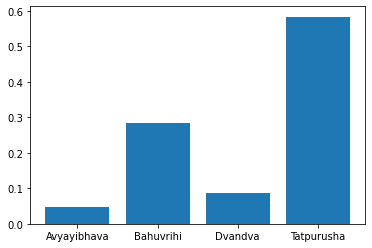

In [31]:
import numpy as np
unique, counts = np.unique(train['labels'], return_counts=True)
counts=counts/sum(counts)
plt.bar(unique, counts)

<BarContainer object of 4 artists>

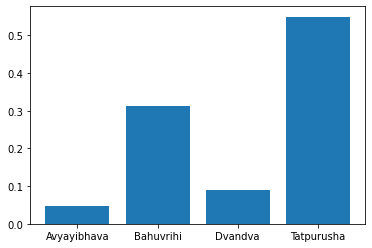

In [41]:
import numpy as np
unique, counts = np.unique(dev['labels'], return_counts=True)
counts=counts/sum(counts)
plt.bar(unique, counts)

<BarContainer object of 4 artists>

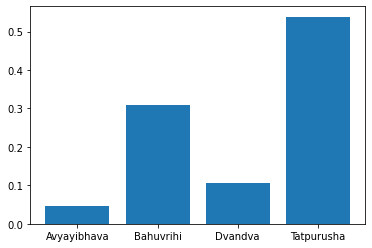

In [32]:
import numpy as np
unique, counts = np.unique(test['labels'], return_counts=True)
counts=counts/sum(counts)
plt.bar(unique, counts)

<BarContainer object of 4 artists>

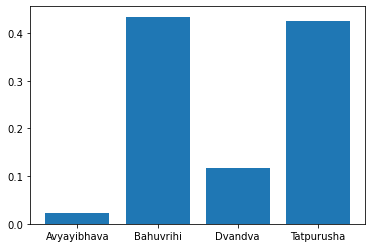

In [39]:
#for cooling data
import numpy as np
unique, counts = np.unique(train_cooling['label'], return_counts=True)
counts=counts/sum(counts)
plt.bar(unique, counts)


<BarContainer object of 4 artists>

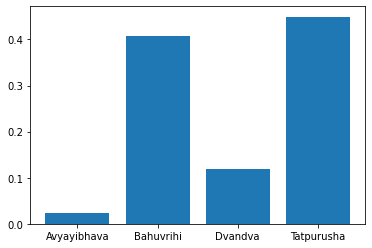

In [35]:
#for cooling data
import numpy as np
unique, counts = np.unique(dev_cooling['label'], return_counts=True)
counts=counts/sum(counts)
plt.bar(unique, counts)


<BarContainer object of 4 artists>

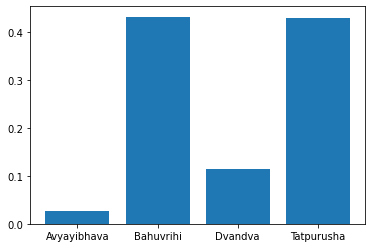

In [40]:
#for cooling data
import numpy as np
unique, counts = np.unique(test_cooling['label'], return_counts=True)
counts=counts/sum(counts)
plt.bar(unique, counts)



In [2]:
import difflib
  
with open('postdep/task2 data with complete info/normal_data/train_normal.conll') as file_1:
    file_1_text = file_1.readlines()
  
with open('postdep/task1/withoutLammaMorphData/train.conll') as file_2:
    file_2_text = file_2.readlines()
pk = []
# Find and print the diff:
for line in difflib.unified_diff(
        file_2_text,file_1_text, fromfile='postdep/task1/withoutLammaMorphData/train.conll', 
        tofile='postdep/task2 data with complete info/normal_data/train_normal.conll', lineterm=''):
    print(line)
    pk.append(line)

--- postdep/task1/withoutLammaMorphData/train.conll
+++ postdep/task2 data with complete info/normal_data/train_normal.conll
@@ -93986,4 +93986,3 @@
 3	वात-श्लेष्म	_	_	_	_	5	Dvandva	_	_

 4	च	_	_	_	_	5	Dvandva	_	_

 5	वात-श्लेष्म	_	_	_	_	0	Dvandva	_	_

-



In [13]:
from difflib import Differ

with open('postdep/task2 data with complete info/normal_data/train_normal.conll') as f1, open('postdep/task1/withoutLammaMorphData/train.conll') as f2:
    same = set(f1).intersection(f2)

same.discard('\n')

with open('some_output_file.txt', 'w') as file_out:
    for line in same:
        file_out.write(line)

In [14]:
same

{'10\tअकरोत्\t_\t_\t_\t_\t15\tTatpurusha\t_\t_\n',
 '2\tरक्तपित्तस्य\t_\t_\t_\t_\t5\tDvandva\t_\t_\n',
 '9\tप्रणिपत्य\t_\t_\t_\t_\t15\tTatpurusha\t_\t_\n',
 '5\tअभिभूयमाने\t_\t_\t_\t_\t11\tTatpurusha\t_\t_\n',
 '8\tअचल-प्रतिष्ठम्\t_\t_\t_\t_\t15\tBahuvrihi\t_\t_\n',
 '5\tअभियोग:\t_\t_\t_\t_\t13\tTatpurusha\t_\t_\n',
 '5\tअन्तरङ्गस्य\t_\t_\t_\t_\t10\tTatpurusha\t_\t_\n',
 '2\tलाङ्गूलम्\t_\t_\t_\t_\t6\tBahuvrihi\t_\t_\n',
 '3\tमते\t_\t_\t_\t_\t5\tTatpurusha\t_\t_\n',
 '8\tकेवसं\t_\t_\t_\t_\t14\tTatpurusha\t_\t_\n',
 '4\tस्वस्य\t_\t_\t_\t_\t10\tTatpurusha\t_\t_\n',
 '5\tराग-गायनम्\t_\t_\t_\t_\t12\tTatpurusha\t_\t_\n',
 '12\tसमुपविष्टः\t_\t_\t_\t_\t14\tTatpurusha\t_\t_\n',
 '1\tअथ\t_\t_\t_\t_\t11\tAvyayibhava\t_\t_\n',
 '7\tपितुः\t_\t_\t_\t_\t13\tTatpurusha\t_\t_\n',
 '5\tदुर्योधनः\t_\t_\t_\t_\t7\tTatpurusha\t_\t_\n',
 '6\tप्रसन्न-चेतसः\t_\t_\t_\t_\t0\tBahuvrihi\t_\t_\n',
 '2\tअसूया-युक्ताय\t_\t_\t_\t_\t8\tTatpurusha\t_\t_\n',
 '2\tइनाम्\t_\t_\t_\t_\t15\tBahuvrihi\t_\t_\n',
 '9\tमत्वा\t_\t